In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
data= pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.groupby('Genre')['Genre'].count()

Genre
Female    112
Male       88
Name: Genre, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

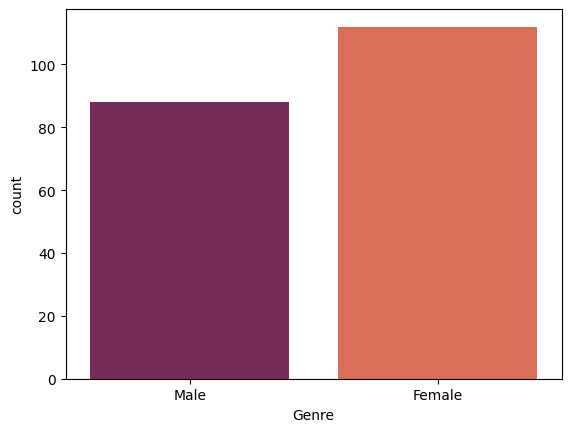

In [6]:
sns.countplot(data=data,x='Genre',palette='rocket')

In [7]:
data.Age.max()

70

In [8]:
data.Age.min()

18

In [9]:
def define_interval(age):
    if age >= 18 and age<30:
        return '18-30'
    elif age <= 50:
        return '30-50'
    else :
        return '+50'

In [10]:
data['age_interval'] = data['Age'].apply(define_interval)

<Axes: xlabel='age_interval', ylabel='count'>

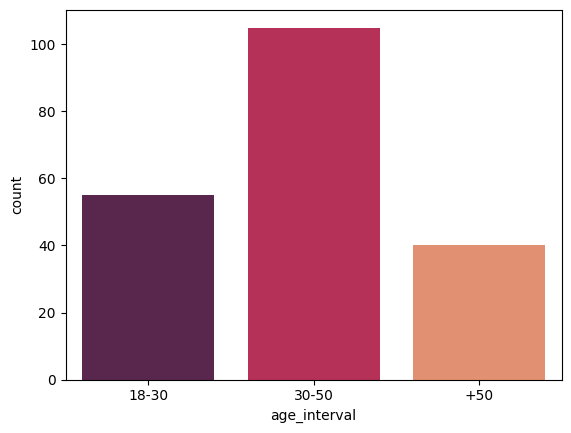

In [11]:
sns.countplot(data=data,x='age_interval',palette='rocket')

In [16]:
data=data.drop('CustomerID',axis=1)
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),age_interval
0,Male,19,15,39,18-30
1,Male,21,15,81,18-30
2,Female,20,16,6,18-30
3,Female,23,16,77,18-30
4,Female,31,17,40,30-50
...,...,...,...,...,...
195,Female,35,120,79,30-50
196,Female,45,126,28,30-50
197,Male,32,126,74,30-50
198,Male,32,137,18,30-50


In [14]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),age_interval
0,Male,19,15,39,18-30
1,Male,21,15,81,18-30
2,Female,20,16,6,18-30
3,Female,23,16,77,18-30
4,Female,31,17,40,30-50
...,...,...,...,...,...
195,Female,35,120,79,30-50
196,Female,45,126,28,30-50
197,Male,32,126,74,30-50
198,Male,32,137,18,30-50


In [27]:
data['Genre']=data['Genre'].replace({'Female':0,'Male':1})

In [26]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),age_interval
0,1,19,15,39,18-30
1,1,21,15,81,18-30
2,0,20,16,6,18-30
3,0,23,16,77,18-30
4,0,31,17,40,30-50
...,...,...,...,...,...
195,0,35,120,79,30-50
196,0,45,126,28,30-50
197,1,32,126,74,30-50
198,1,32,137,18,30-50


In [31]:
le=LabelEncoder()
data['age_interval']=le.fit_transform(data['age_interval'])

In [32]:
le.classes_

array(['+50', '18-30', '30-50'], dtype=object)

In [37]:
sc=StandardScaler()

In [38]:
x_standarised=sc.fit_transform(data)

# **Elbow Method**

In [76]:
wcss = [KMeans(n_clusters=k,random_state=0).fit(x_standarised).inertia_ for k in range(1, 11)]

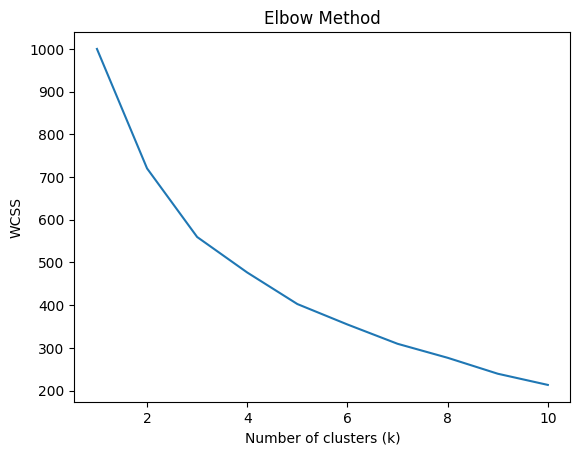

In [73]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [77]:
km=KMeans(n_clusters=5,init='k-means++')

In [78]:
km.fit(x_standarised)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

# Dimensionality Reduction

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_standarised)

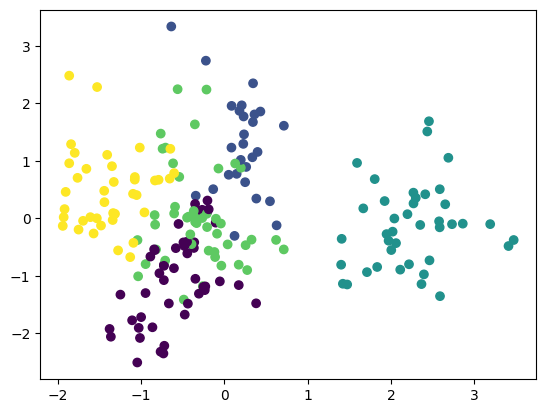

In [85]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='viridis')
# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.show()